# Tarea 2.2.- Búsqueda no informada en Python

Antonio Ortega Góngora

#### Realizar los imports necesarios para que el programa funcione, previa instalación de librerías (matplotlib)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

#### Definición de la clase Grafo

En esta sección definimos la clase `Grafo` que implementa los algoritmos de búsqueda no informada:

- **`__init__`**: Inicializa el grafo como un diccionario vacío
- **`agregar_arista`**: Permite añadir nodos y sus vecinos al grafo
- **`bfs`**: Implementa la Búsqueda en Anchura (Breadth-First Search) usando una cola
  - Explora el grafo nivel por nivel
  - Utiliza una estructura de datos `deque` (cola)
  - Retorna el orden de los nodos visitados
- **`dfs`**: Implementa la Búsqueda en Profundidad (Depth-First Search) de forma recursiva
  - Explora primero en profundidad antes de retroceder
  - Utiliza la pila de llamadas recursivas
  - Retorna el orden de los nodos visitados
- **`dfs_iterativo`**: Implementa DFS de forma iterativa usando una pila explícita
  - Mismo comportamiento que DFS pero sin recursión
  - Utiliza una lista como pila
- **`visualizar`**: Crea una representación visual del grafo usando NetworkX y Matplotlib
  - Muestra los nodos, aristas y la estructura jerárquica
- **`_hierarchical_layout`**: Calcula las posiciones de los nodos para la visualización jerárquica
  - Organiza los nodos por niveles desde la raíz

In [2]:
class Grafo:
    
    def __init__(self):
        self.grafo = {}
    
    def agregar_arista(self, nodo, vecinos):
        self.grafo[nodo] = vecinos
    
    def bfs(self, inicio):
        visitados = set()
        cola = deque([inicio])
        recorrido = []
        
        while cola:
            nodo = cola.popleft()
            
            if nodo not in visitados:
                visitados.add(nodo)
                recorrido.append(nodo)
                
                if nodo in self.grafo:
                    for vecino in self.grafo[nodo]:
                        if vecino not in visitados:
                            cola.append(vecino)
        
        return recorrido
    
    def dfs(self, inicio):
        visitados = set()
        recorrido = []
        
        def dfs_recursivo(nodo):
            visitados.add(nodo)
            recorrido.append(nodo)
            
            if nodo in self.grafo:
                for vecino in self.grafo[nodo]:
                    if vecino not in visitados:
                        dfs_recursivo(vecino)
        
        dfs_recursivo(inicio)
        return recorrido
    
    def dfs_iterativo(self, inicio):
        visitados = set()
        pila = [inicio]
        recorrido = []
        
        while pila:
            nodo = pila.pop()
            
            if nodo not in visitados:
                visitados.add(nodo)
                recorrido.append(nodo)

                if nodo in self.grafo:
                    for vecino in reversed(self.grafo[nodo]):
                        if vecino not in visitados:
                            pila.append(vecino)
        
        return recorrido
    
    def visualizar(self, titulo="Grafo", raiz=None):
        G = nx.DiGraph()

        for nodo, vecinos in self.grafo.items():
            for vecino in vecinos:
                G.add_edge(nodo, vecino)

        if raiz is None:
            raiz = list(self.grafo.keys())[0]

        plt.figure(figsize=(14, 10))
        pos = self._hierarchical_layout(G, raiz)

        nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                               node_size=2000, alpha=0.9,
                               edgecolors='navy', linewidths=2)
        nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                               arrows=True, arrowsize=25, 
                               arrowstyle='->', width=2.5,
                               connectionstyle='arc3,rad=0.1')
        
        plt.title(titulo, fontsize=18, fontweight='bold', pad=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def _hierarchical_layout(self, G, raiz):
        pos = {}
        niveles = {}
        cola = deque([(raiz, 0)])
        visitados = {raiz}
        
        while cola:
            nodo, nivel = cola.popleft()
            
            if nivel not in niveles:
                niveles[nivel] = []
            niveles[nivel].append(nodo)

            if nodo in self.grafo:
                for vecino in self.grafo[nodo]:
                    if vecino not in visitados:
                        visitados.add(vecino)
                        cola.append((vecino, nivel + 1))

        max_ancho = max(len(nodos) for nodos in niveles.values())
        
        for nivel, nodos in niveles.items():
            y = -nivel  
            ancho = len(nodos)
            
            for i, nodo in enumerate(nodos):
                if ancho == 1:
                    x = 0
                else:
                    x = (i - (ancho - 1) / 2) * (max_ancho / ancho)
                
                pos[nodo] = (x, y)
        
        return pos


#### Ejemplo de aplicación de los algoritmos de búsqueda

En esta sección ejecutamos ejemplos prácticos de los algoritmos implementados:

**Primer ejemplo - Árbol con letras:**
- Estructura: 
  - Raíz A con hijos B y C
  - B tiene hijos D y E
  - C tiene hijo F
  - E tiene hijos G y H
- Se ejecutan los tres algoritmos (BFS, DFS recursivo y DFS iterativo) desde el nodo 'A'
- Se visualiza el grafo con su estructura jerárquica
- Se comparan los diferentes recorridos obtenidos

**Segundo ejemplo - Árbol numérico:**
- Estructura más compleja con nodos numéricos (1-9)
- El nodo 1 es la raíz con múltiples hijos
- Se ejecutan BFS y DFS desde el nodo 1
- Se visualiza el segundo grafo para comparar los resultados

**Objetivo:** Demostrar las diferencias entre:
- **BFS**: Explora por niveles (primero todos los vecinos directos, luego los siguientes niveles)
- **DFS**: Explora en profundidad (va lo más profundo posible antes de retroceder)

ALGORITMOS DE BÚSQUEDA EN GRAFOS: BFS Y DFS

BFS (Búsqueda en Anchura) desde 'A':
Recorrido: A -> B -> C -> D -> E -> F -> G -> H

DFS Recursivo (Búsqueda en Profundidad) desde 'A':
Recorrido: A -> B -> D -> E -> G -> H -> C -> F

DFS Iterativo (con pila) desde 'A':
Recorrido: A -> B -> D -> E -> G -> H -> C -> F

DIFERENCIAS:
BFS: Explora nivel por nivel (usa cola)
DFS: Explora profundidad primero (usa pila/recursión)


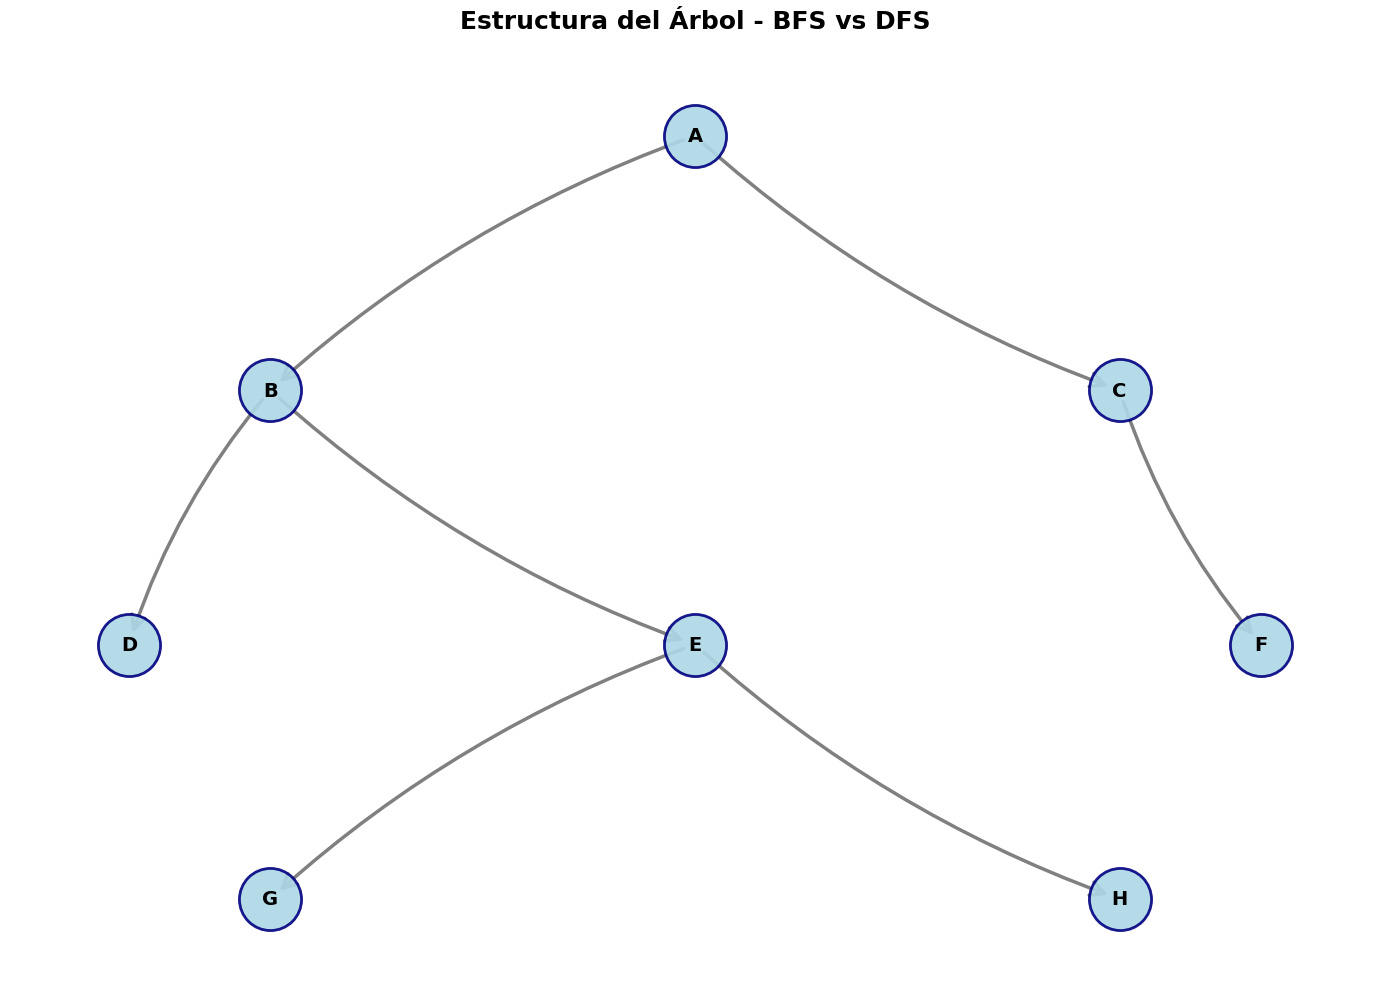


✅ ¡Ejemplo completado!

Otro ejemplo con un grafo más complejo:
------------------------------------------------------------

🔍 BFS desde nodo 1: 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9
🔍 DFS desde nodo 1: 1 -> 2 -> 5 -> 6 -> 9 -> 3 -> 7 -> 4 -> 8


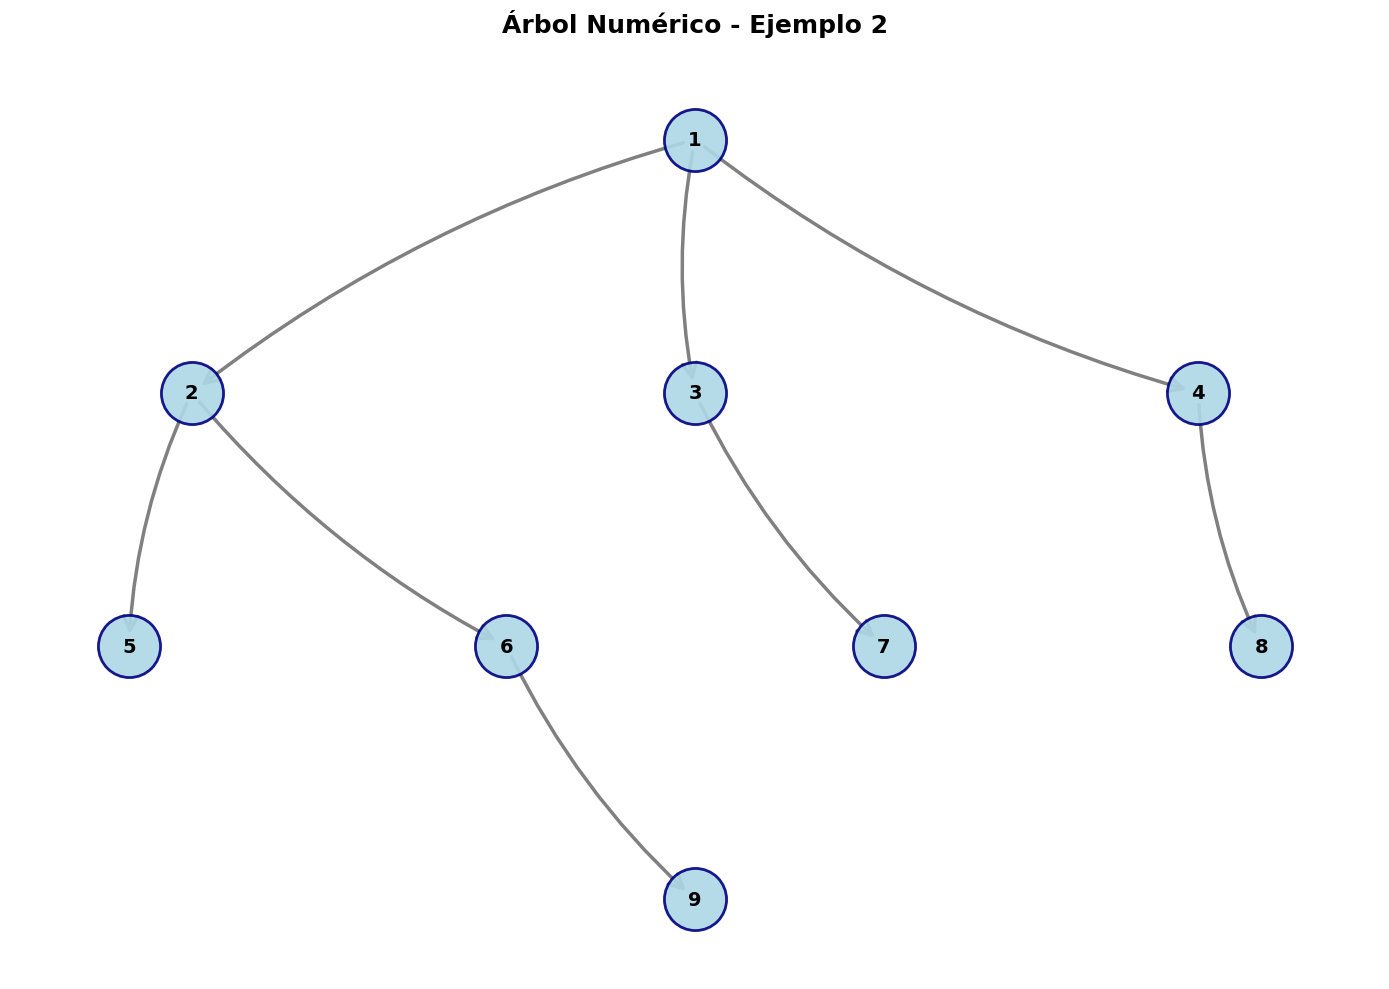

In [ ]:
if __name__ == "__main__":
    print("=" * 60)
    print("ALGORITMOS DE BÚSQUEDA EN GRAFOS: BFS Y DFS")
    print("=" * 60)
    
    g = Grafo()
    
    # Construir un árbol/grafo de ejemplo
    #       A
    #      / \
    #     B   C
    #    / \   \
    #   D   E   F
    #      / \
    #     G   H
    
    g.agregar_arista('A', ['B', 'C'])
    g.agregar_arista('B', ['D', 'E'])
    g.agregar_arista('C', ['F'])
    g.agregar_arista('D', [])
    g.agregar_arista('E', ['G', 'H'])
    g.agregar_arista('F', [])
    g.agregar_arista('G', [])
    g.agregar_arista('H', [])

    nodo_inicio = 'A'
    
    print(f"\nBFS (Búsqueda en Anchura) desde '{nodo_inicio}':")
    resultado_bfs = g.bfs(nodo_inicio)
    print(f"Recorrido: {' -> '.join(resultado_bfs)}")
    
    print(f"\nDFS Recursivo (Búsqueda en Profundidad) desde '{nodo_inicio}':")
    resultado_dfs = g.dfs(nodo_inicio)
    print(f"Recorrido: {' -> '.join(resultado_dfs)}")
    
    print(f"\nDFS Iterativo (con pila) desde '{nodo_inicio}':")
    resultado_dfs_iter = g.dfs_iterativo(nodo_inicio)
    print(f"Recorrido: {' -> '.join(resultado_dfs_iter)}")
    
    print("\n" + "=" * 60)
    print("DIFERENCIAS:")
    print("=" * 60)
    print("BFS: Explora nivel por nivel (usa cola)")
    print("DFS: Explora profundidad primero (usa pila/recursión)")

    g.visualizar("Estructura del Árbol - BFS vs DFS", raiz='A')
    
    print("\n✅ ¡Ejemplo completado!")
    print("\nOtro ejemplo con un grafo más complejo:")
    print("-" * 60)
    g2 = Grafo()
    g2.agregar_arista(1, [2, 3, 4])
    g2.agregar_arista(2, [5, 6])
    g2.agregar_arista(3, [7])
    g2.agregar_arista(4, [8])
    g2.agregar_arista(5, [])
    g2.agregar_arista(6, [9])
    g2.agregar_arista(7, [])
    g2.agregar_arista(8, [])
    g2.agregar_arista(9, [])
    
    print(f"\nBFS desde nodo 1: {' -> '.join(map(str, g2.bfs(1)))}")
    print(f"DFS desde nodo 1: {' -> '.join(map(str, g2.dfs(1)))}")
    
    g2.visualizar("Árbol Numérico - Ejemplo 2", raiz=1)